In [39]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
from scipy.spatial.transform import Rotation as R

In [42]:

subject_name = 'darryl'
exercise_name = 'ee'
base_path = Path('../data')
base_path = base_path / subject_name / exercise_name
data = pkl.load(open(base_path / 'imu_marker_deviations.pkl', 'rb'))

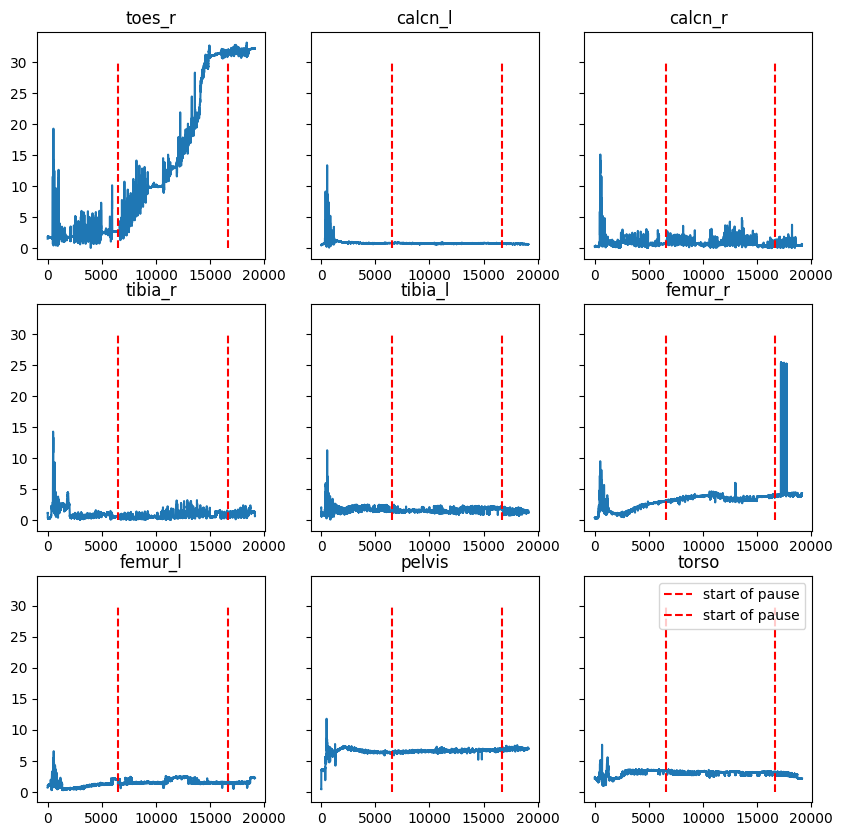

In [43]:
fig, axs = plt.subplots(3,3, figsize=(10,10), sharey=True)
axs = axs.flatten()
for i,  (pos, d) in enumerate(data.items()):
    axs[i].plot(d)
    axs[i].vlines(6541, 0, 30, color='red', linestyle='--', label='start of pause')
    axs[i].vlines(16704, 0, 30, color='red', linestyle='--', label='start of pause')
    axs[i].set_title(pos)
    if i == 8:
        axs[i].legend()
plt.show()

- tibia l & calcn l sind die besten -> spricht für offset bei Filter

In [11]:
def read_trc_file(filename):

        if not os.path.exists(filename):
            print('file does not exist')

        # read all lines
        file_id = open(filename, 'r')
        all_lines = file_id.readlines()
        file_id.close()

        marker_names = all_lines[3].split('\t')
        marker_names.remove('Frame#')
        marker_names.remove('Time')

        if '\n' in marker_names:
            marker_names.remove('\n')

        marker_names = [x for x in marker_names if x != '']
        col_names = ['Time']
        for m in marker_names:
            col_names.append(f'{m}_x')
            col_names.append(f'{m}_y')
            col_names.append(f'{m}_z')

        data = []
        line_idx = 5
        while line_idx < all_lines.__len__():
            d = all_lines[line_idx].split('\t')[1:]
            if len(d) != len(col_names):
                raise ValueError(f'Number of columns in line {line_idx} does not match number of marker columns')
            data.append(d)
            line_idx += 1

        measured_data = pd.DataFrame(data=data, columns=col_names).astype('float', errors='ignore')
        return measured_data

marker_data = read_trc_file(str(base_path / 'ik_imus' / f'marker_data_osim_format_{subject_name}_{exercise_name}.trc'))

In [19]:
toes_data = np.array(data['toes_r'])
max_toes_data = np.argmax(toes_data, axis=0)
marker_data[['R_TOE1_x', 'R_TOE1_y', 'R_TOE1_z', 'R_TOE2_x', 'R_TOE2_y', 'R_TOE2_z','R_TOE3_x', 'R_TOE3_y', 'R_TOE3_z',]].iloc[max_toes_data]

R_TOE1_x    738.752869
R_TOE1_y     59.967888
R_TOE1_z    -95.169594
R_TOE2_x    705.277466
R_TOE2_y     90.937965
R_TOE2_z    -43.089832
R_TOE3_x    694.234314
R_TOE3_y     82.057632
R_TOE3_z    -90.368378
Name: 25094, dtype: float64

In [37]:
ind_data = np.array(data['pelvis'])
max_ind_data = np.argmax(ind_data, axis=0)
print(f'max ind data: {max_ind_data}, with deviation: {ind_data[max_ind_data]}')

max ind data: 24529, with deviation: 16.335635160057464


In [41]:
R1 = R.from_euler('xyz', [-3.78, 0.06, -7.77], degrees=True)
R2 = R.from_euler('xyz', [3.26, -1.56, -1.82], degrees=True)
diff = R1.inv() * R2
print(np.linalg.norm(diff.as_rotvec(degrees=True)))

9.414611954265029
